In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

## Load The Data

In [2]:
data = pd.read_csv('Downloads/Spotify Data.csv')

C:\Users\alaa\AppData\Local\Temp\ipykernel_3452\1427655798.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Downloads/Spotify Data.csv')


In [3]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

## Clean The Data

In [5]:
# Delete Unused Columns
data = data.drop(columns = ["id", "track_href", "uri", "analysis_url", "Unnamed: 0", "title"])

In [6]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,269208,4,hardstyle,NaN
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,210112,4,hardstyle,NaN
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,234823,4,hardstyle,NaN
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,323200,4,hardstyle,NaN


In [7]:
data.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
dtype: int64

In [8]:
# Convert ms to minutes to be more readable
minutes = (data["duration_ms"]/(1000*60))%60
data["minutes"] = minutes

In [9]:
data = data.drop(columns = ["duration_ms"])
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,time_signature,genre,song_name,minutes
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,4,Dark Trap,Mercury: Retrograde,2.075650
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,4,Dark Trap,Pathology,3.740450
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,4,Dark Trap,Symbiote,1.647017
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),2.061017
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4,Dark Trap,Venom,2.054967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,4,hardstyle,NaN,4.486800
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,4,hardstyle,NaN,3.501867
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,4,hardstyle,NaN,3.913717
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,4,hardstyle,NaN,5.386667


## Explore Categoral Data

In [10]:
data["type"].value_counts()

audio_features    42305
Name: type, dtype: int64

In [11]:
# Delete (type) column, it has one value
data = data.drop(columns = ["type"])

In [12]:
# Delete Unused column in the model
data = data.drop(columns = ["song_name"])

In [13]:
data["genre"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

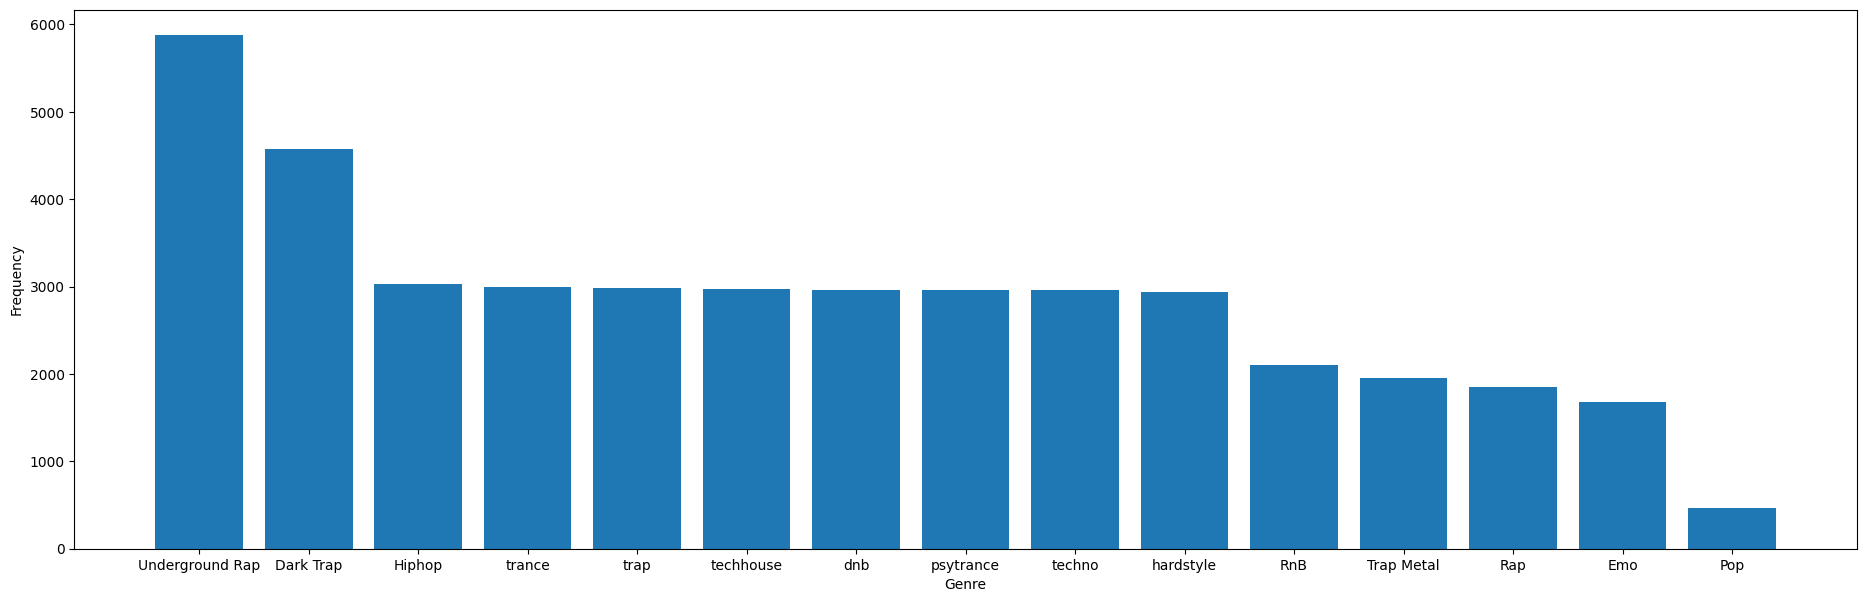

In [14]:
plt.figure(figsize=(23, 7))

plt.bar(data["genre"].value_counts().index, data["genre"].value_counts())

plt.xlabel("Genre")
plt.ylabel("Frequency")

plt.show()

In [15]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,minutes
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,4,Dark Trap,2.075650
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,4,Dark Trap,3.740450
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,4,Dark Trap,1.647017
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,3,Dark Trap,2.061017
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,4,Dark Trap,2.054967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,4,hardstyle,4.486800
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,4,hardstyle,3.501867
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,4,hardstyle,3.913717
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,4,hardstyle,5.386667


# Statistical Information about Data

In [16]:
data.describe().round()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,minutes
count,42305.0,42305.0,42305.0,42305.0,42305.0,42305.0,42305.0,42305.0,42305.0,42305.0,42305.0,42305.0,42305.0
mean,1.0,1.0,5.0,-6.0,1.0,0.0,0.0,0.0,0.0,0.0,147.0,4.0,4.0
std,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,2.0
min,0.0,0.0,0.0,-33.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,1.0,0.0
25%,1.0,1.0,1.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,4.0,3.0
50%,1.0,1.0,6.0,-6.0,1.0,0.0,0.0,0.0,0.0,0.0,145.0,4.0,4.0
75%,1.0,1.0,9.0,-5.0,1.0,0.0,0.0,1.0,0.0,1.0,161.0,4.0,5.0
max,1.0,1.0,11.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,220.0,5.0,15.0


In [17]:
corr = data.corr()
corr

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,minutes
danceability,1.000000,-0.323248,-0.012708,-0.216776,0.084413,0.182177,0.069910,-0.067114,-0.196702,0.369845,-0.165929,0.057711,-0.049807
energy,-0.323248,1.000000,0.044731,0.601540,-0.032203,-0.148363,-0.497334,0.303875,0.231754,-0.013520,-0.024504,0.039781,0.294464
key,-0.012708,0.044731,1.000000,-0.006810,-0.248283,-0.030634,-0.004937,0.068266,0.002753,0.028600,-0.009862,0.008061,0.069255
loudness,-0.216776,0.601540,-0.006810,1.000000,-0.004744,0.048035,-0.283876,-0.187933,0.167104,0.080916,0.151610,0.047471,-0.095999
mode,0.084413,-0.032203,-0.248283,-0.004744,1.000000,0.050260,-0.014514,-0.016402,0.007280,0.022208,-0.012191,-0.009317,-0.031253
speechiness,0.182177,-0.148363,-0.030634,0.048035,0.050260,1.000000,0.160184,-0.386571,0.057432,0.218829,0.164674,0.021637,-0.309892
acousticness,0.069910,-0.497334,-0.004937,-0.283876,-0.014514,0.160184,1.000000,-0.261896,-0.107229,0.099328,0.055643,-0.049791,-0.246681
instrumentalness,-0.067114,0.303875,0.068266,-0.187933,-0.016402,-0.386571,-0.261896,1.000000,-0.015990,-0.257068,-0.207667,-0.010164,0.603784
liveness,-0.196702,0.231754,0.002753,0.167104,0.007280,0.057432,-0.107229,-0.015990,1.000000,-0.025156,0.028327,0.003077,0.010594
valence,0.369845,-0.013520,0.028600,0.080916,0.022208,0.218829,0.099328,-0.257068,-0.025156,1.000000,0.058374,0.040308,-0.191093


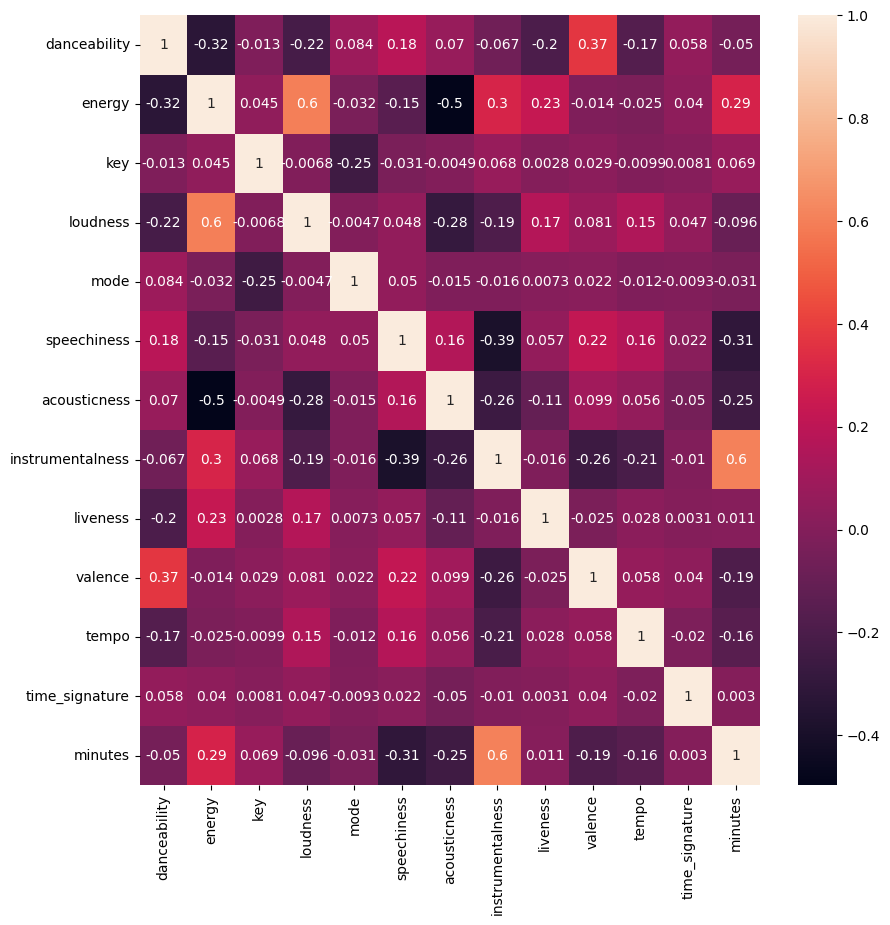

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

## Preprocessing The Data

In [19]:
# Make label encoder to genere to calculate correlation 
label = preprocessing.LabelEncoder()
genre = label.fit_transform(data["genre"])

In [20]:
data = data.drop(columns = ["genre"])

In [21]:
data["genre"] = genre
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,minutes,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,4,2.075650,0
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,4,3.740450,0
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,4,1.647017,0
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,3,2.061017,0
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,4,2.054967,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,4,4.486800,9
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,4,3.501867,9
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,4,3.913717,9
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,4,5.386667,9


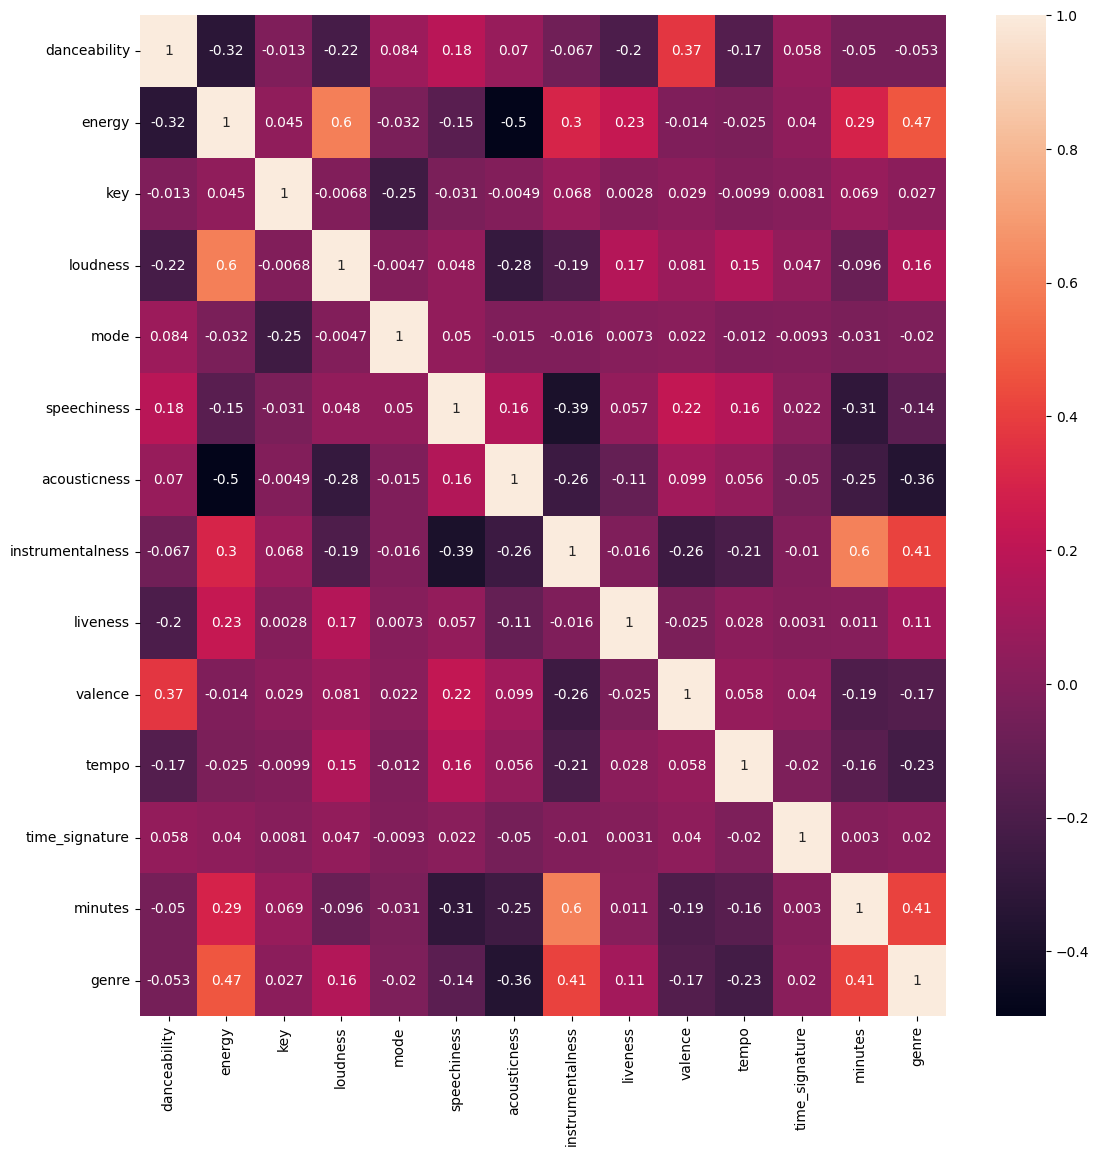

In [22]:
corr = data.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr, annot=True)
plt.show()

In [23]:
data["genre"].value_counts()

7     5875
0     4578
2     3028
13    2999
14    2987
11    2975
8     2966
10    2961
12    2956
9     2936
5     2099
6     1956
4     1848
1     1680
3      461
Name: genre, dtype: int64

In [24]:
features = data.drop(columns = ["genre"])
y = data["genre"]

In [25]:
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,minutes
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,4,2.075650
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,4,3.740450
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,4,1.647017
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,3,2.061017
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,4,2.054967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,4,4.486800
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,4,3.501867
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,4,3.913717
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,4,5.386667


## Feature Scalling (Scale the data between 0 and 1)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
features = scaler.fit_transform(features)

In [27]:
features = pd.DataFrame(features)
features

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.829884,0.813955,0.181818,0.712039,1.0,0.430304,0.060525,0.013549,0.045943,0.382028,0.610006,0.75,0.111487
1,0.708527,0.492877,0.727273,0.715710,1.0,0.061410,0.405870,0.000000,0.109792,0.108635,0.351848,0.75,0.224043
2,0.850471,0.892974,0.454545,0.782742,1.0,0.042890,0.013967,0.000004,0.369692,0.021046,0.986200,0.75,0.082507
3,0.445227,0.780947,0.000000,0.784742,1.0,0.086971,0.023987,0.000000,0.105699,0.161250,0.794595,0.50,0.110497
4,0.794127,0.623909,0.181818,0.703712,1.0,0.292754,0.219635,0.000000,0.158907,0.590426,0.554579,0.75,0.110088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.501571,0.692925,0.363636,0.772743,1.0,0.008340,0.031882,0.000349,0.112862,0.387187,0.567055,0.75,0.274503
42301,0.489652,0.767944,0.000000,0.696754,0.0,0.027293,0.022772,0.000018,0.198813,0.375838,0.566531,0.75,0.207912
42302,0.320620,0.820956,0.727273,0.828791,1.0,0.030109,0.026315,0.000245,0.382994,0.108635,0.597377,0.75,0.235757
42303,0.446311,0.920981,0.545455,0.782906,0.0,0.017871,0.000557,0.029929,0.047887,0.484164,0.567233,0.75,0.335342


In [28]:
features.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.622239,0.762458,0.488204,0.736654,0.549462,0.123319,0.097327,0.286196,0.208103,0.349119,0.551413,0.743145,0.253834
std,0.169701,0.183868,0.333286,0.080569,0.497553,0.136649,0.172902,0.374915,0.179654,0.240586,0.146896,0.067085,0.116015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.497237,0.631911,0.090909,0.690207,0.000000,0.028593,0.001750,0.000000,0.090965,0.146807,0.443338,0.750000,0.173801
50%,0.629429,0.802952,0.545455,0.742994,1.000000,0.057186,0.016598,0.006006,0.127187,0.312906,0.536005,0.750000,0.224418
75%,0.759454,0.922981,0.818182,0.790138,1.000000,0.184447,0.108299,0.730030,0.289880,0.519241,0.637599,0.750000,0.310477
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


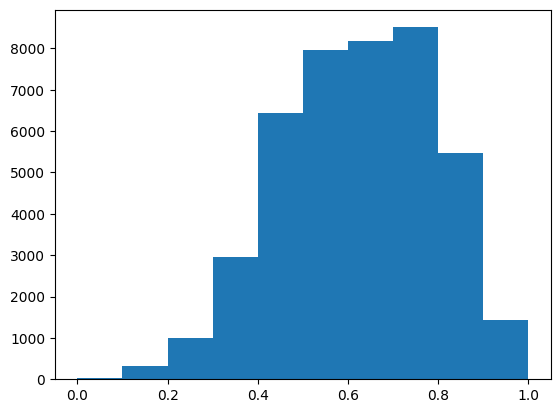

In [29]:
plt.hist(features[0])
plt.show()

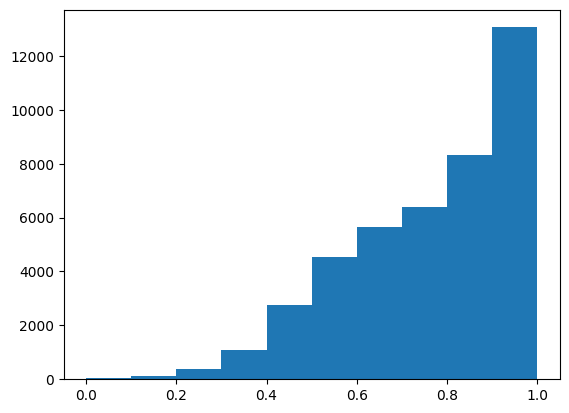

In [30]:
plt.hist(features[1])
plt.show()

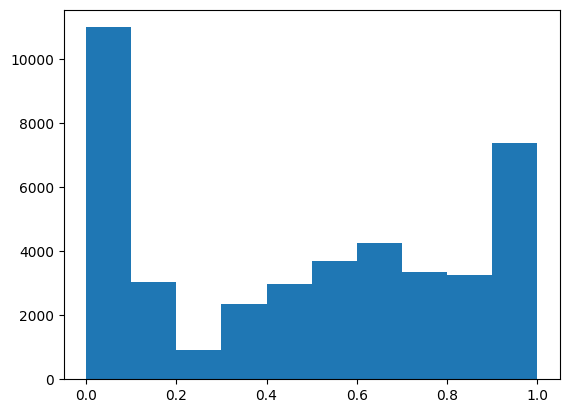

In [31]:
plt.hist(features[2])
plt.show()

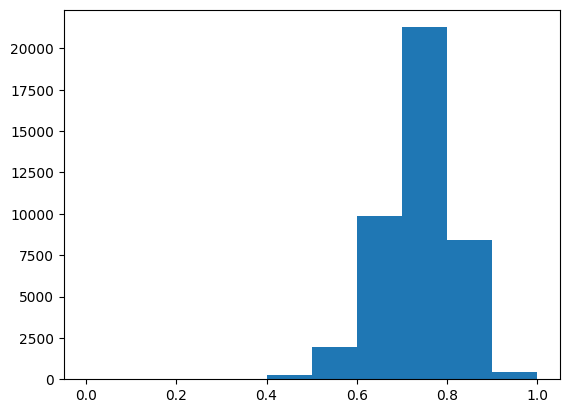

In [32]:
plt.hist(features[3])
plt.show()

## Handle Imbalanced Data

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X1, Y1 = smote.fit_resample(features, y)

print(X1.shape)

(88125, 13)


## Split The Data

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

In [37]:
print(x_train.shape)
print(y_train.shape)

(70500, 13)
(70500,)


# Model Selection

In [65]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=3000)
cVal = cross_val_score(model, x_train, y_train, cv = k_folds)
model = model.fit(x_train, y_train)

In [67]:
print("Cross Validation Scores: ", cVal)
print("Average CV Score: ", cVal.mean())

Cross Validation Scores:  [0.57900709 0.58212766 0.58496454 0.58695035 0.58553191 0.58425532
 0.57858156 0.58453901 0.58014184 0.56865248]
Average CV Score:  0.5814751773049646


In [68]:
pred = model.predict(x_test)
pred

array([ 8,  8, 10, ..., 11, 12,  4])

In [69]:
acc = model.score(x_test, y_test)
acc

0.5836028368794326

### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(max_depth=10, min_samples_split=10)
cVal = cross_val_score(model2, x_train, y_train, cv = k_folds)
model2 = model2.fit(x_train, y_train)

In [44]:
print("Cross Validation Scores: ", cVal)
print("Average CV Score: ", cVal.mean())

Cross Validation Scores:  [0.63744681 0.64468085 0.64361702 0.64368794 0.64404255]
Average CV Score:  0.6426950354609928


In [45]:
pred2 = model2.predict(x_test)
pred2

array([ 8,  8, 10, ..., 11, 10, 12])

In [78]:
acc2 = model2.score(x_test, y_test)
acc2

0.6411914893617021

### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

model3 = GaussianNB()
cVal = cross_val_score(model3, x_train, y_train, cv = k_folds)
model3 = model3.fit(x_train, y_train)

In [48]:
print("Cross Validation Scores: ", cVal)
print("Average CV Score: ", cVal.mean())

Cross Validation Scores:  [0.58141844 0.58723404 0.59078014 0.58432624 0.58851064]
Average CV Score:  0.5864539007092198


In [49]:
pred3 = model3.predict(x_test)
pred3

array([ 8,  8, 10, ..., 11, 12,  4])

In [79]:
acc3 = model3.score(x_test, y_test)
acc3

0.5823546099290781

### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier(n_neighbors = 5)
model4 = model4.fit(x_train, y_train)

In [52]:
pred4 = model4.predict(x_test)
pred4

array([ 8,  8, 10, ..., 11, 12,  0])

In [80]:
acc4 = model4.score(x_test, y_test)
acc4

0.7552340425531915

### SVM

In [54]:
from sklearn import svm

model5 = svm.SVC(kernel='linear')
cVal = cross_val_score(model5, x_train, y_train, cv = k_folds)
model5 = model5.fit(x_train, y_train)

In [55]:
print("Cross Validation Scores: ", cVal)
print("Average CV Score: ", cVal.mean())

Cross Validation Scores:  [0.62382979 0.63567376 0.63198582 0.62609929 0.62439716]
Average CV Score:  0.6283971631205674


In [56]:
pred5 = model5.predict(x_test)
pred5

array([ 8,  8, 10, ..., 11, 10,  4])

In [81]:
acc5 = model5.score(x_test, y_test)
acc5

0.6323404255319149

### Random Forest

In [86]:
scores =[]

for i in range(1, 200):
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

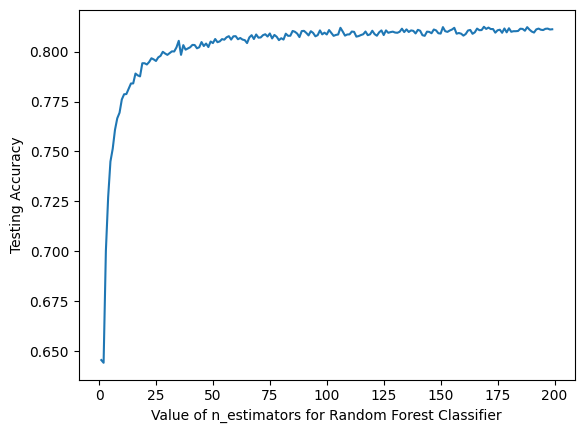

In [87]:
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')
plt.show()

In [91]:
maxs = max(scores)
max_index = scores.index(maxs)
max_index

168

In [92]:
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(n_estimators = max_index)
cVal = cross_val_score(model6, x_train, y_train, cv = k_folds)
model6.fit(x_train, y_train)

RandomForestClassifier(n_estimators=168)

In [93]:
print("Cross Validation Scores: ", cVal)
print("Average CV Score: ", cVal.mean())

Cross Validation Scores:  [0.80028369 0.80085106 0.80794326 0.80652482 0.8048227  0.81475177
 0.80312057 0.80510638 0.80624113 0.80326241]
Average CV Score:  0.8052907801418439


In [94]:
pred6 = model6.predict(x_test)
pred6

array([ 8,  8, 10, ..., 11, 12,  7])

In [95]:
acc6 = model6.score(x_test, y_test)
acc6

0.8115177304964539

### Neural Network

In [77]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(13,10,15), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 10, 15), max_iter=500)

In [83]:
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

In [84]:
train_score = accuracy_score(predict_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(predict_test, y_test)
print("score on test data: ", test_score)

score on train data:  0.6614893617021277
score on test data:  0.6575886524822695


## Compare Between Models

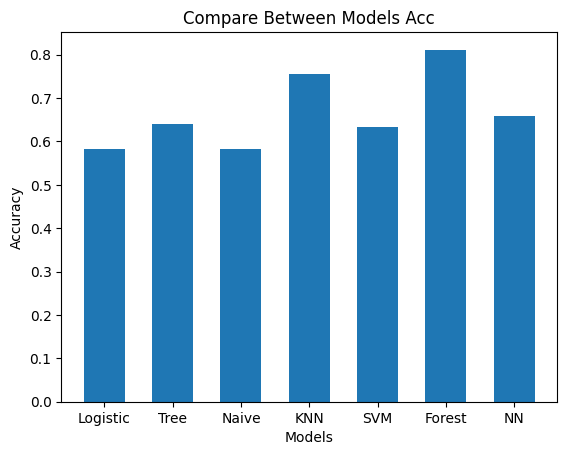

In [110]:
height = np.array([acc, acc2, acc3, acc4, acc5, acc6, test_score])

bars = np.array(['Logistic', 'Tree', 'Naive', 'KNN', 'SVM', 'Forest', 'NN'])
x_pos = np.arange(len(bars))

plt.bar(x_pos, height, width = 0.6)

plt.xticks(x_pos, bars)

plt.title('Compare Between Models Acc')

plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()